# Project Objectives and Aims
 
 
This task's goal is to find hate speech in tweets. For ease of use, we define a tweet as having hate speech inside it if it has a racist or sexist emotion. To categorise racist or sexist tweets from other tweets is the challenge at hand.

Technically, the goal is to predict the labels on the test dataset given a training sample of tweets and labels, where:

        label '1' denotes the tweet is racist or sexist   
        label '0' denotes the tweet is neither racist nor sexist.
The aim is to predict the labels on the test dataset.

The gotten dataset is 31,962 tweets for training the models. Each line of the csv
file containing the dataset has a tweetid, its label, and the tweet itself.



In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re    #re is regular expressions which is used to get words or phrase
import string #to get information from string
import nltk #natural language toolkit 
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

from keras.callbacks import EarlyStopping


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [251]:
!pip install nltk

In [252]:
#Loading in the Dataset


df =pd.read_csv('twitter_dataset/twitter_scrap.csv')
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [253]:
#get datatype information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


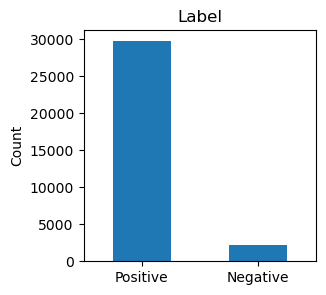

In [254]:
plt.figure(figsize=(3,3))
view =df['label'].value_counts().plot(kind='bar')
view.set_ylabel('Count', size=10)
view.set_xticklabels(['Positive','Negative'], rotation=0)
view.set_title('Label');
plt.show()

In [255]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# REMOVING UNWANTED WORDS

because twitter users have handle and this is referenced with '@' followed immediately with their profile name, this has to be removed because we are interested in the raciest or sexist comment.


In [256]:
#remove pattern from the dataset
def pop_pattern(input_val,text):
    read_values = re.findall(text,input_val)
    
    for vals in read_values:
        input_val = re.sub(vals,"",input_val)
    return input_val

In [257]:
#remove the @user from the tweet we want to train and test
df['new_tweet'] = np.vectorize(pop_pattern)(df['tweet'],"@[\w]*")

In [258]:
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                           new_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [259]:
# to reomve speacial character, numbers  & punctuation

df['new_tweet'] = df['new_tweet'].str.replace('[^a-zA-Z#]',' ')

In [260]:
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                           new_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation

In [261]:
#remove short words especially 3 words
df['new_tweet'] = df['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                           new_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

In [262]:
#making individual word as token i.e making each word stand alone

token_tweet = df['new_tweet'].apply(lambda x: x.split())

token_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: new_tweet, dtype: object

# Applying stemming

In [263]:
#steam the words
import nltk
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

token_tweet = token_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: new_tweet, dtype: object

# Applying lemmatizer


In [264]:
import nltk
#nltk.download()

In [265]:
from nltk.stem import WordNetLemmatizer

lmt = WordNetLemmatizer()


token_tweet = token_tweet.apply(lambda sentence: [lmt.lemmatize(word) for word in sentence])

token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: new_tweet, dtype: object

In [266]:
#concverting the stemmed words into single sentence

for i in range(len(token_tweet)):
    token_tweet[i] = " ".join(token_tweet[i])

    
df['new_tweet'] = token_tweet
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                           new_tweet  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit caus they offer wheelchair ...  
2                                bihday your majesti  
3                         #model love take with time  
4                           factsguid societi #motiv

# Oversampling The data

This is to make the data balance for training, so we can amount of negative comment as the positive comment.

In [267]:
from sklearn.utils import resample

df_pos = df[df['label']== 0]
df_neg = df[df['label']== 1]

In [268]:
df_pos.shape, df_neg.shape

((29720, 4), (2242, 4))

In [269]:
df_pos  = resample(df_pos,replace=True,n_samples= df_pos.shape[0],random_state=42)
df_neg  = resample(df_neg,replace=True,n_samples= (df_pos.shape[0]),random_state=42)

In [270]:
df_pos.shape, df_neg.shape

((29720, 4), (29720, 4))

In [271]:
#merging all the data as 1


df = pd.concat([df_pos,
                df_neg
                ],axis=0)

In [272]:
df.head()

id  label                                              tweet  \
25437  25438      0  i thought you were happy but you turn me out~ ...   
16981  16982      0  @user @user @user people like you have nothing...   
930      931      0                       #friday  xoxosamantha  via     
5787    5788      0  damn my life is pretty awesome right now... ki...   
23188  23189      0   @user its time for celebration. wish you fath...   

                                               new_tweet  
25437                            thought were happi turn  
16981  peopl like have noth contribut kick from be co...  
930                                 #friday xoxosamantha  
5787   damn life pretti awesom right kid great bill p...  
23188        time celebr wish father differ #father #day

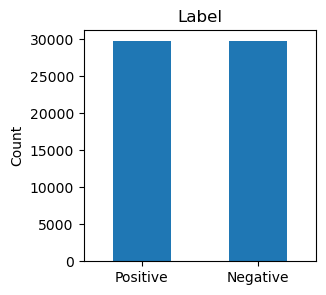

In [273]:
plt.figure(figsize=(3,3))
view =df['label'].value_counts().plot(kind='bar')
view.set_ylabel('Count', size=10)
view.set_title('Label');
view.set_xticklabels(['Positive','Negative'], rotation=0)
plt.show()

# Visualising The Data

Display the frequent words, then the positive and negative words

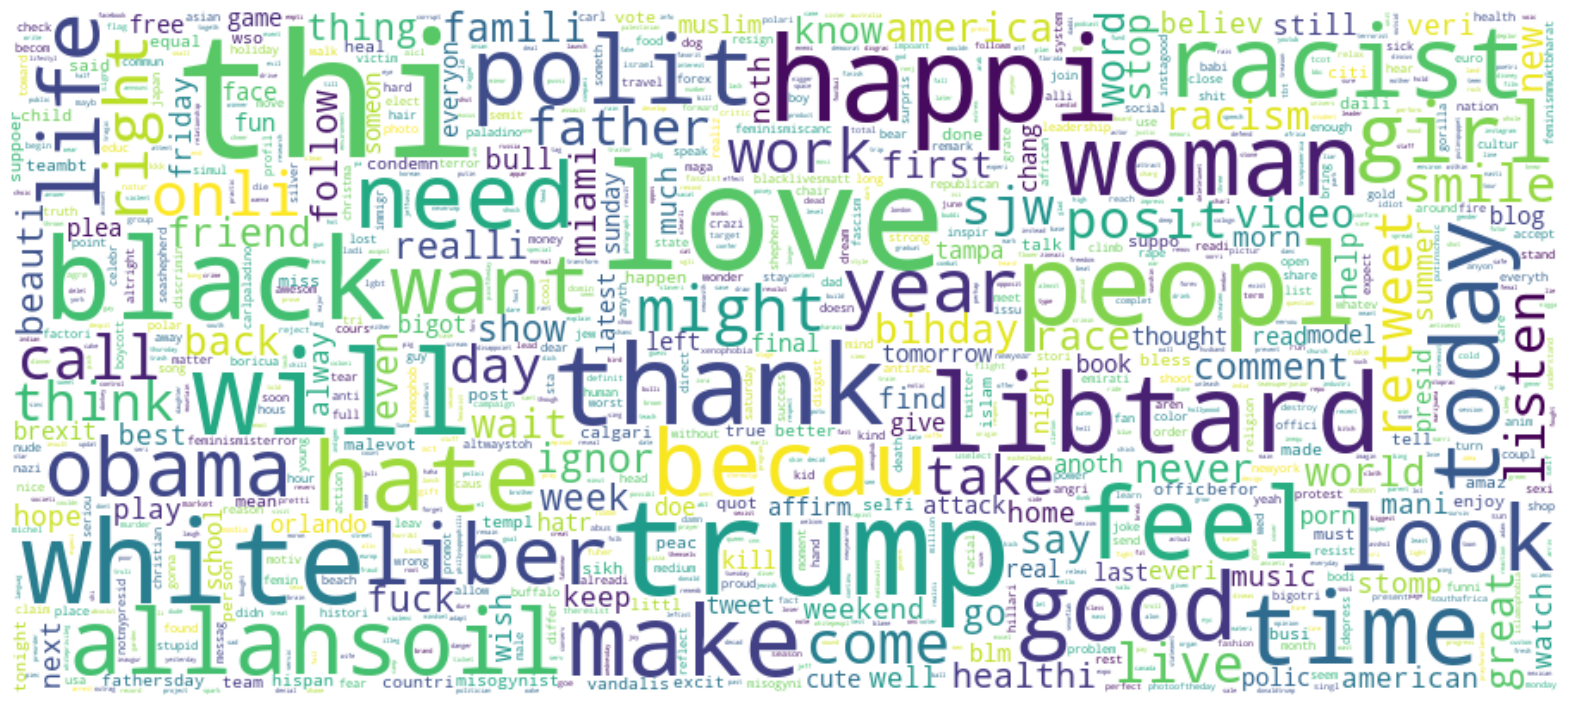

In [274]:
#visualize the frequent words

all_words = " ".join([sentence for sentence in df['new_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(collocations=False,background_color="white",height = 400,width = 900, random_state = 42,max_words = 1000, max_font_size = 100).generate(all_words)



plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

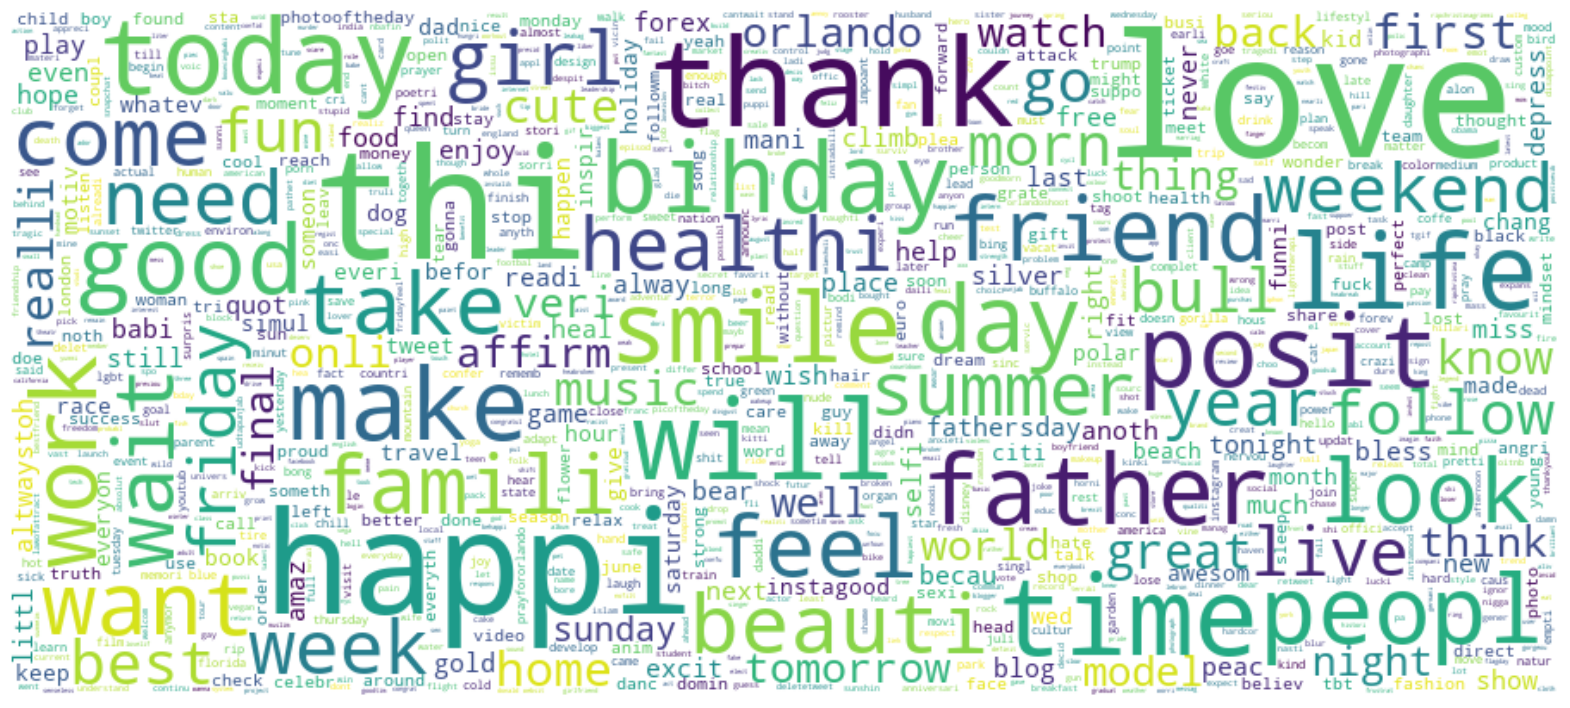

In [275]:
#popular positive comment
all_words = " ".join([sentence for sentence in df['new_tweet'][df['label']==0]])


wordcloud = WordCloud(collocations=False,background_color="white",max_words = 1000,height = 400,width = 900, random_state = 42, max_font_size = 100).generate(all_words)


plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

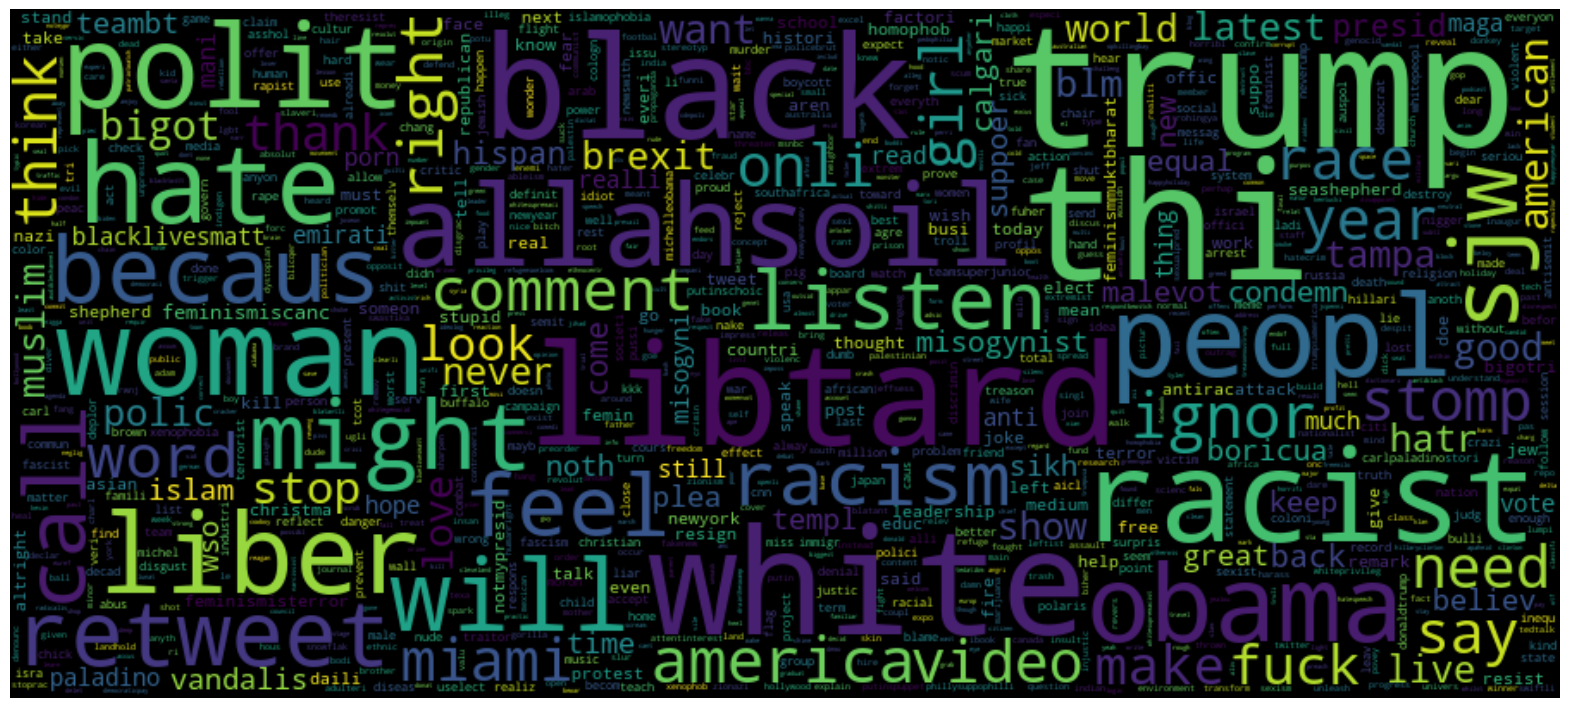

In [276]:
#popular egative comment
all_words = " ".join([sentence for sentence in df['new_tweet'][df['label']==1]])


wordcloud = WordCloud(collocations=False,background_color="black",max_words = 1000,height = 400,width = 900, random_state = 42, max_font_size = 100).generate(all_words)


plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [277]:
#removing the hashtags


def remove_hashtag(tweets):
    hashtag = []
    #loop throught the tweets
    for word in tweets:
        ht = re.findall(r"#(\w+)",word)
        hashtag.append(ht)
    return hashtag

In [278]:
#remove hashtags from non sexiest or non raciest tweets

ht_pos = remove_hashtag(df['new_tweet'][df['label']==0])

#remove hashtags from  sexiest or   raciest tweets

ht_neg = remove_hashtag(df['new_tweet'][df['label']==1])

In [279]:
#len(ht_pos)
#len(ht_neg)

In [280]:
ht_pos[:5]

[[], ['guncontrol'], ['friday'], [], ['father', 'day']]

In [281]:
#make them into a single list

ht_pos = sum(ht_pos,[])
ht_neg = sum(ht_neg,[])

In [282]:
ht_neg[:5]

['stopsex', 'womensright', 'women', 'christma', 'trump']

In [283]:
#Converting the dictionary into a dataframe to 
#list positive hashtags with count

In [284]:
freq_count =nltk.FreqDist(ht_pos)

df_pos = pd.DataFrame({
    'Hashtags': list(freq_count.keys()),
    'Count'  : list(freq_count.values())
    
})

df_pos.head()

Hashtags  Count
0        guncontrol      6
1            friday    244
2            father    195
3               day    304
4  flightofalifetim      9

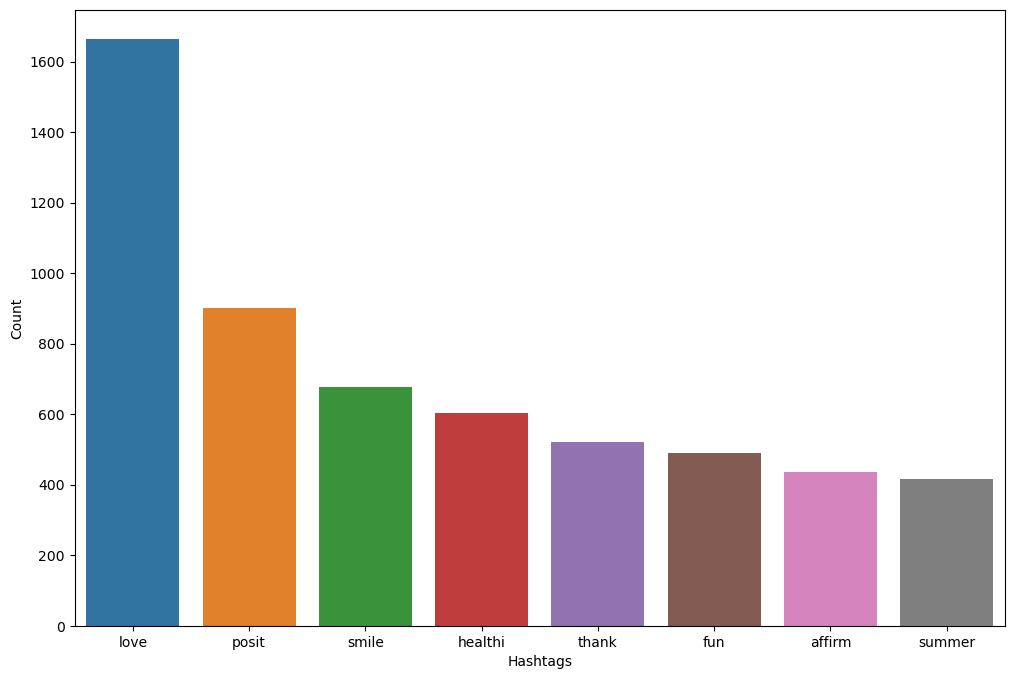

In [285]:
#select the top 8 hastag

df_pos = df_pos.nlargest(columns='Count',n=8)
plt.figure(figsize=(12,8))
sns.barplot(data= df_pos,x='Hashtags',y="Count")
plt.show()

In [286]:
freq_count =nltk.FreqDist(ht_neg)

df_neg = pd.DataFrame({
    'Hashtags': list(freq_count.keys()),
    'Count'  : list(freq_count.values())
    
})

df_neg.head()

Hashtags  Count
0      stopsex     12
1  womensright     12
2        women    152
3     christma     47
4        trump   1822

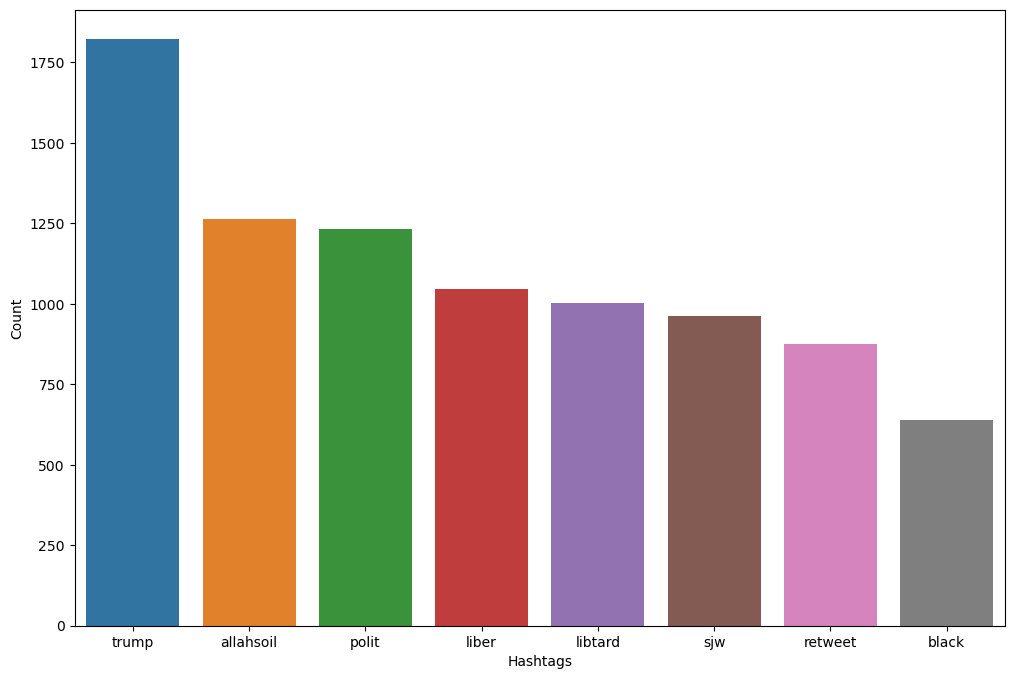

In [287]:
#select the top 8 hastag

df_neg = df_neg.nlargest(columns='Count',n=8)
plt.figure(figsize=(12,8))
sns.barplot(data= df_neg,x='Hashtags',y="Count")
plt.show()

# Transforming the Dataset Using TF-IDF Vectorize 

Fit the TF-IDF Vectorizer

In [288]:
X= df.new_tweet
y= df.label

In [289]:
from sklearn.model_selection import train_test_split


# Separating the 70% data for training data and 30% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state =21)

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  104733


In [291]:
#Transform the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Function for Model Evaluation

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

*Accuracy Score

*Confusion Matrix 

*ROC-AUC Curve

In [292]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)


    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))


    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Building
In the problem statement, we have used three different models respectively :

*Bernoulli Naive Bayes Classifier

*SVM (Support Vector Machine)

*Logistic Regression

the idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8939
           1       0.97      1.00      0.98      8893

    accuracy                           0.98     17832
   macro avg       0.98      0.98      0.98     17832
weighted avg       0.98      0.98      0.98     17832



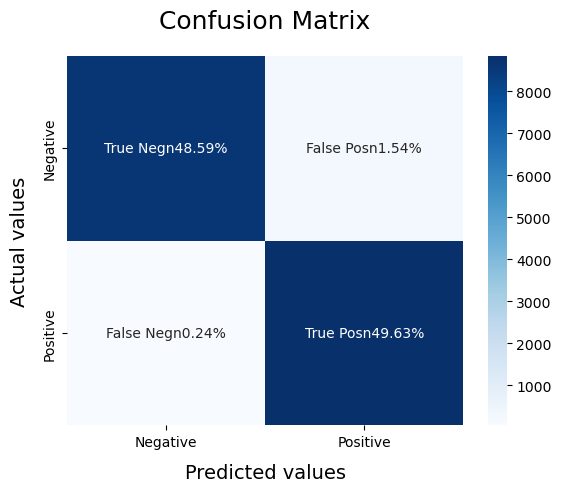

In [293]:
#model 1

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

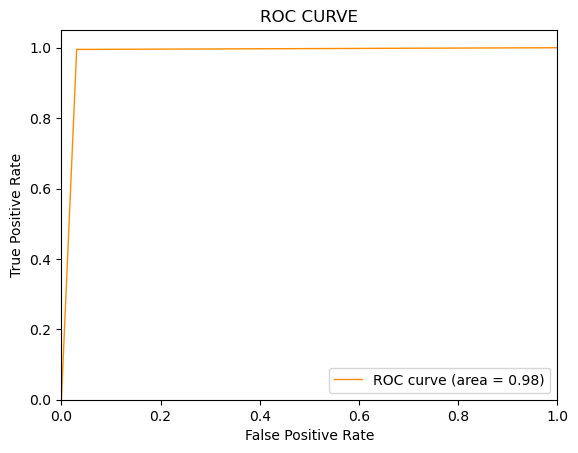

In [294]:
#Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8939
           1       0.99      1.00      0.99      8893

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832



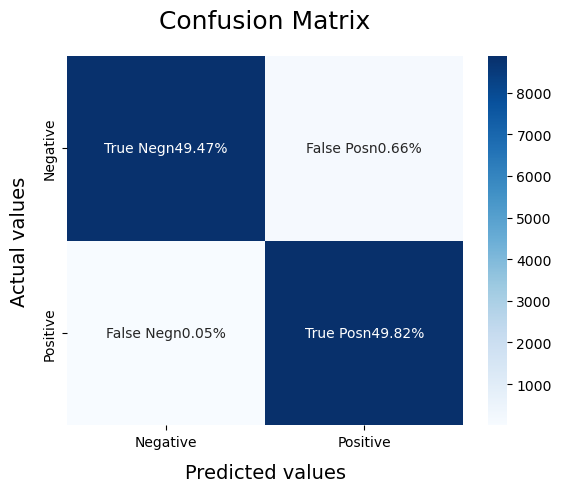

In [295]:
#model 2

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

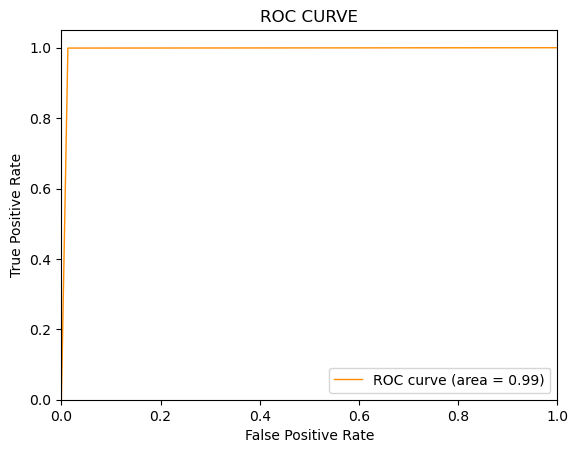

In [296]:
#Plot the ROC-AUC Curve for model-2

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8939
           1       0.98      1.00      0.99      8893

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832



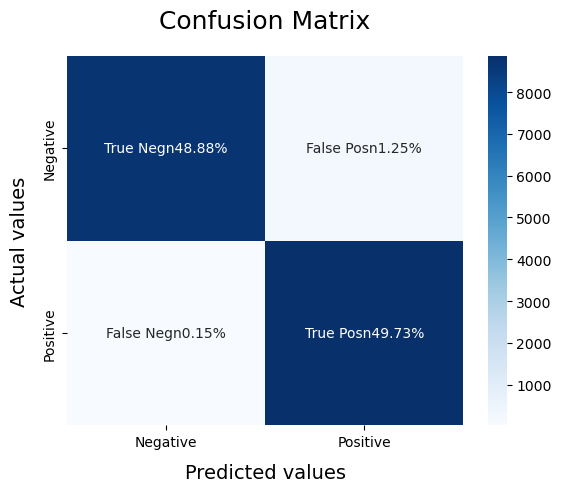

In [297]:
#model 3

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

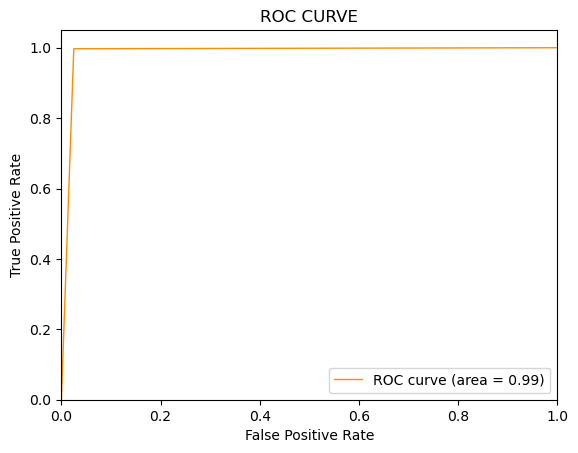

In [298]:
#plot the ROC-AUC Curve for model-3

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


# Model architecture – LSTM

In [299]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,GlobalMaxPooling1D, LSTM, Flatten,Conv1D, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
 

# Model Training – With LSTM , CNN & Bidirectional LSTM

In [342]:
X= df.new_tweet
y= df.label


In [361]:
# Encoded the target column
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
y = lb.fit_transform(df['label'])
y

array([0, 0, 0, ..., 1, 1, 1])

In [362]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df['new_tweet'].values)
X = tokenizer.texts_to_sequences(df['new_tweet'].values)
X = pad_sequences(X)

# Model architecture – LSTM¶

In [371]:
model = Sequential()
model.add(Embedding(500, 128, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 17, 128)           64000     
                                                                 
 spatial_dropout1d_13 (Spati  (None, 17, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_14 (LSTM)              (None, 196)               254800    
                                                                 
 flatten_2 (Flatten)         (None, 196)               0         
                                                                 
 dense_14 (Dense)            (None, 2)                 394       
                                                                 
Total params: 319,194
Trainable params: 319,194
Non-trainable params: 0
_______________________________________________

In [372]:
y=pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=1)
print("X_train Shape : ",X_train.shape)
print("y_train Shape : ",y_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_test Shape : ",y_test.shape)



X_train Shape :  (41608, 17)
y_train Shape :  (41608, 2)
X_test Shape :  (17832, 17)
y_test Shape :  (17832, 2)


In [373]:
batch_size=32
history = model.fit(X_train, y_train, 
          epochs = 80, 
          batch_size=batch_size,
          callbacks= EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
          validation_split = 0.1,
          verbose = 'auto')

Epoch 1/80
1171/1171 [==============================] - 35s 28ms/step - loss: 0.3327 - accuracy: 0.8436 - val_loss: 0.2751 - val_accuracy: 0.8750
Epoch 2/80
1171/1171 [==============================] - 34s 29ms/step - loss: 0.2640 - accuracy: 0.8786 - val_loss: 0.2434 - val_accuracy: 0.8897
Epoch 3/80
1171/1171 [==============================] - 39s 34ms/step - loss: 0.2356 - accuracy: 0.8890 - val_loss: 0.2186 - val_accuracy: 0.9053
Epoch 4/80
1171/1171 [==============================] - 35s 30ms/step - loss: 0.2071 - accuracy: 0.9066 - val_loss: 0.1939 - val_accuracy: 0.9185
Epoch 5/80
1171/1171 [==============================] - 33s 28ms/step - loss: 0.1808 - accuracy: 0.9182 - val_loss: 0.1725 - val_accuracy: 0.9310
Epoch 6/80
1171/1171 [==============================] - 33s 28ms/step - loss: 0.1600 - accuracy: 0.9286 - val_loss: 0.1643 - val_accuracy: 0.9327
Epoch 7/80
1171/1171 [==============================] - 32s 27ms/step - loss: 0.1435 - accuracy: 0.9362 - val_loss: 0.1576 -

In [374]:
accr = model.evaluate(X_test,y_test)
print("Test Score: ",accr[0])
print("Test Accuracy : ",accr[1])

558/558 [==============================] - 3s 6ms/step - loss: 0.1129 - accuracy: 0.9601
Test Score:  0.112888865172863
Test Accuracy :  0.9601278305053711


In [390]:
# Prediction on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 

# Convert test data to one hot vectors
#y_true = np.argmax(y_test.idxmax(axis = 1), axis = 1)'
y_test = y_test.idxmax(axis = 1)

558/558 [==============================] - 3s 6ms/step


In [383]:
a = y_test.idxmax(axis=1)
a

11432    1
23204    1
12233    0
10186    0
16816    0
        ..
9211     1
2744     0
16747    0
2963     1
19715    0
Length: 17832, dtype: int64

In [379]:
a= np.argmax(a) 

In [391]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Test')
ax.set_ylabel('predicted')

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Model architecture – CNN¶

In [240]:
cnn_model = Sequential()

embedding_layer = Embedding(500, 120, input_length = X.shape[1])
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(2, activation='softmax'))

In [241]:
#model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 17, 120)           60000     
                                                                 
 conv1d (Conv1D)             (None, 13, 128)           76928     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 137,186
Trainable params: 137,186
Non-trainable params: 0
_________________________________________________________________
None


In [242]:
# Model training

cnn_model_history = cnn_model.fit(X_train,
                                  y_train,
                                  batch_size=batch_size,
                                  epochs=80,
                                  callbacks= EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
                                  verbose='auto',
                                  validation_split=0.1)

Epoch 1/80
1171/1171 [==============================] - 4s 3ms/step - loss: 0.2940 - acc: 0.8668 - val_loss: 0.2143 - val_acc: 0.9041
Epoch 2/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.1725 - acc: 0.9250 - val_loss: 0.1556 - val_acc: 0.9291
Epoch 3/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.1212 - acc: 0.9487 - val_loss: 0.1244 - val_acc: 0.9450
Epoch 4/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.0914 - acc: 0.9599 - val_loss: 0.1083 - val_acc: 0.9548
Epoch 5/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.0758 - acc: 0.9655 - val_loss: 0.1023 - val_acc: 0.9591
Epoch 6/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.0673 - acc: 0.9685 - val_loss: 0.0992 - val_acc: 0.9606
Epoch 7/80
1171/1171 [==============================] - 3s 3ms/step - loss: 0.0642 - acc: 0.9692 - val_loss: 0.1052 - val_acc: 0.9584
Epoch 8/80
1171/1171 [==============================] - 3s 3ms

In [243]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)

558/558 [==============================] - 1s 1ms/step - loss: 0.1158 - acc: 0.9630


In [244]:
# Model Performance  

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.11576685309410095
Test Accuracy: 0.9630439877510071


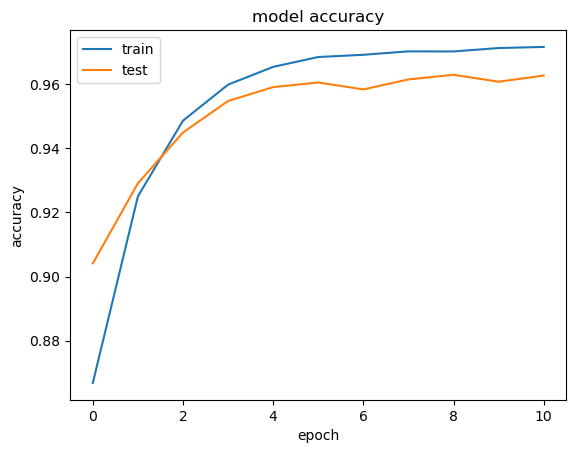

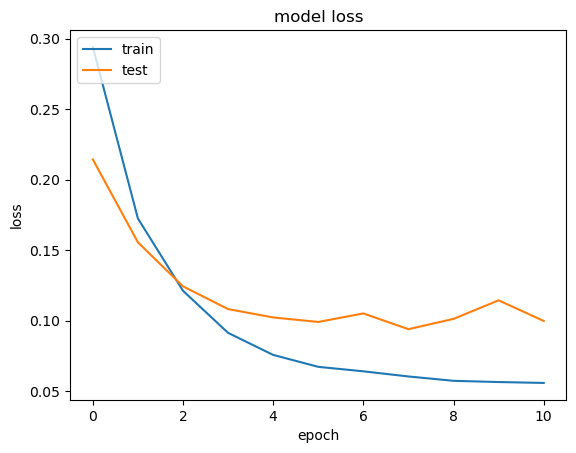

In [245]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Model architecture – Bi-Directional LSTM Model¶

In [246]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(128, activation='tanh',return_sequences=False)))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


2023-04-19 16:40:02.137979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 16:40:02.140199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 16:40:02.141689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 17, 120)           60000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              254976    
 l)                                                              
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 315,490
Trainable params: 315,490
Non-trainable params: 0
_________________________________________________________________
None


In [247]:
history4 = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=80,
                             callbacks= EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
                            verbose='auto',
                             validation_data=(X_test, y_test))

Epoch 1/80


2023-04-19 16:40:02.578491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 16:40:02.580488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 16:40:02.581877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1301/1301 [==============================] - ETA: 0s - loss: 0.3163 - accuracy: 0.8514

2023-04-19 16:40:25.186940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 16:40:25.188026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 16:40:25.189198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1301/1301 [==============================] - 26s 18ms/step - loss: 0.3163 - accuracy: 0.8514 - val_loss: 0.2598 - val_accuracy: 0.8799
Epoch 2/80
1301/1301 [==============================] - 23s 18ms/step - loss: 0.2425 - accuracy: 0.8881 - val_loss: 0.2232 - val_accuracy: 0.9011
Epoch 3/80
1301/1301 [==============================] - 22s 17ms/step - loss: 0.1968 - accuracy: 0.9111 - val_loss: 0.1984 - val_accuracy: 0.9126
Epoch 4/80
1301/1301 [==============================] - 23s 18ms/step - loss: 0.1586 - accuracy: 0.9300 - val_loss: 0.1655 - val_accuracy: 0.9298
Epoch 5/80
1301/1301 [==============================] - 22s 17ms/step - loss: 0.1282 - accuracy: 0.9439 - val_loss: 0.1495 - val_accuracy: 0.9372
Epoch 6/80
1301/1301 [==============================] - 22s 17ms/step - loss: 0.1039 - accuracy: 0.9540 - val_loss: 0.1242 - val_accuracy: 0.9519
Epoch 7/80
1301/1301 [==============================] - 22s 17ms/step - loss: 0.0897 - accuracy: 0.9601 - val_loss: 0.1310 - val_accura

In [248]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.11576685309410095
Test Accuracy: 0.9630439877510071


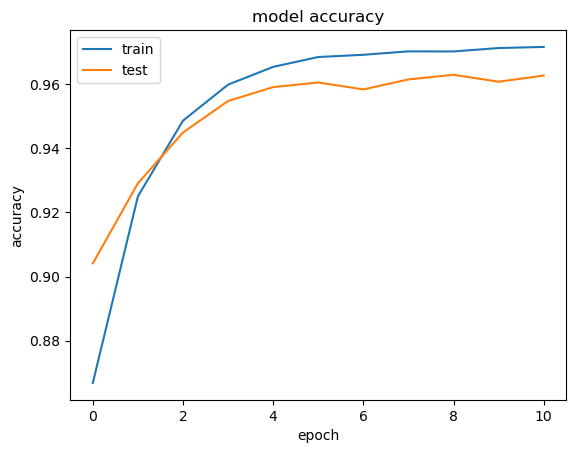

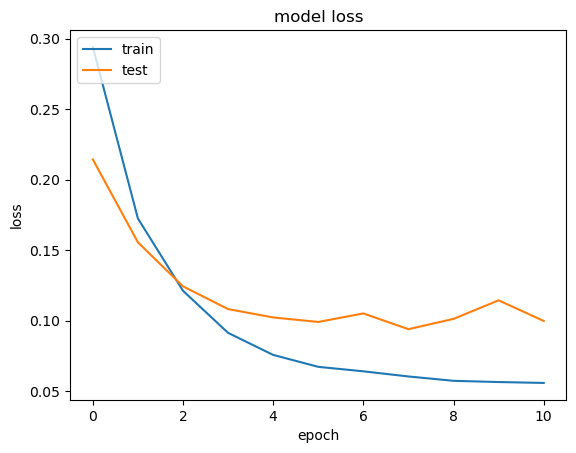

In [249]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Sentiment Analysis using BERT

In [70]:
!pip install transformers

In [71]:
from transformers import BertTokenizer, TFBertForSequenceClassification, BertForSequenceClassification
from transformers import InputExample, InputFeatures, TrainingArguments, Trainer
import torch


# Import BERT model

In [72]:

!pip install tensorflow-hub

In [73]:

!pip install tensorflow-text

In [74]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text



In [75]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2023-04-10 21:53:11.122668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-10 21:53:11.123309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-10 21:53:11.123436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-10 21:53:11.123784: I tensorflow/core/

In [76]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.51327264, -0.88845724, ..., -0.74748874,
        -0.75314736,  0.91964483],
       [-0.8720836 , -0.5054398 , -0.9444668 , ..., -0.8584752 ,
        -0.71745354,  0.8808299 ]], dtype=float32)>

In [77]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

2023-04-10 21:53:21.210357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-04-10 21:53:21.230362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-04-10 21:53:21.360088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-04-10 2

In [78]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['new_tweet'],
                                                    df['label'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [80]:
len(X_train)

41608

In [81]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [82]:
model.fit(X_train,
          y_train, 
          epochs=3,
         callbacks= EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
         )

Epoch 1/3


2023-04-10 21:53:24.925625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3}}]]
2023-04-10 21:53:24.925710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4}}]]
2023

2023-04-10 21:53:25.422080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-04-10 21:53:25.422209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-04-10 21:53:25.422313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

2023-04-10 21:53:25.955300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-04-10 21:53:25.955414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-04-10 21:53:25.955523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

1301/1301 [==============================] - ETA: 0s - loss: 0.5597 - accuracy: 0.7105 - precision: 0.7166 - recall: 0.6950WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


1301/1301 [==============================] - 5969s 5s/step - loss: 0.5597 - accuracy: 0.7105 - precision: 0.7166 - recall: 0.6950
Epoch 2/3
1301/1301 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.7665 - precision: 0.7767 - recall: 0.7472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


1301/1301 [==============================] - 5717s 4s/step - loss: 0.4870 - accuracy: 0.7665 - precision: 0.7767 - recall: 0.7472
Epoch 3/3
1301/1301 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.7735 - precision: 0.7826 - recall: 0.7564WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


1301/1301 [==============================] - 5276s 4s/step - loss: 0.4721 - accuracy: 0.7735 - precision: 0.7826 - recall: 0.7564


In [83]:
model.evaluate(X_test, y_test)

558/558 [==============================] - 2269s 4s/step - loss: 0.4603 - accuracy: 0.7835 - precision: 0.7505 - recall: 0.8516


[0.4603364169597626, 0.7834791541099548, 0.7504679560661316, 0.851553738117218]

In [84]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

558/558 [==============================] - 2264s 4s/step


In [85]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, ..., 1, 1, 1])

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[6353, 2533],
       [1328, 7618]])

Text(50.722222222222214, 0.5, 'Truth')

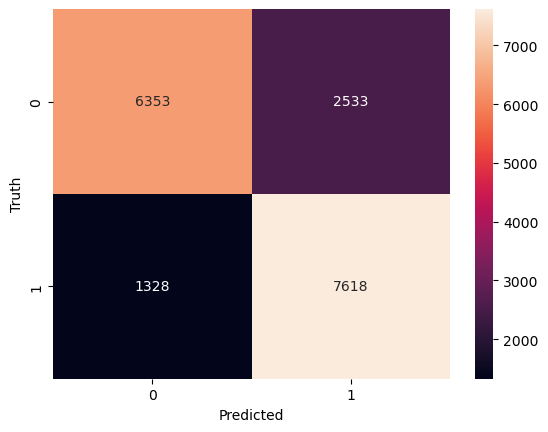

In [87]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.83      0.71      0.77      8886
           1       0.75      0.85      0.80      8946

    accuracy                           0.78     17832
   macro avg       0.79      0.78      0.78     17832
weighted avg       0.79      0.78      0.78     17832



In [2]:
!pip install happytransformer

In [100]:
from happytransformer import HappyTextClassification, TCTrainArgs

In [7]:
happy_tc = HappyTextClassification("BERT", "ProsusAI/finbert", num_labels=3)

04/12/2023 10:23:57 - INFO - happytransformer.happy_transformer -   Using model: cpu


# Testing the Pre-trainned model

In [8]:
#testing using a positive comment

result = happy_tc.classify_text("Nigeria's Naira just increased by 20%")
print(result)

TextClassificationResult(label='positive', score=0.9516503810882568)


In [9]:
print(result.label)
print(result.score)

positive
0.9516503810882568


In [11]:
#testing using a negative comment

result = happy_tc.classify_text("Bitcoin has decreased by 5%")
print(result.label)
print(result.score)


negative
0.9592188596725464


# Training – NLP Sentiment Analysis

In [101]:
happy_tc = HappyTextClassification(model_type="DISTILBERT",
                                   model_name="distilbert-base-uncased-finetuned-sst-2-english",
                                   num_labels=2) 

04/12/2023 11:41:19 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [102]:
#increasing the epochs from the default number of 3 to 5

args = TCTrainArgs(num_train_epochs=5)


In [130]:
df_new= df[['new_tweet','label']]


print(df_new.head(6))

                                               new_tweet  label
25437                            thought were happi turn      0
16981  peopl like have noth contribut kick from be co...      0
930                                 #friday xoxosamantha      0
5787   damn life pretti awesom right kid great bill p...      0
23188        time celebr wish father differ #father #day      0
12871                                 come work thi love      0


In [154]:
df_new.to_csv('twitter_dataset/bert_Ttest.csv')


In [156]:
happy_tc.train('twitter_dataset/bert_Ttest.csv', args=args)

04/12/2023 13:33:31 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


# Evaluating

In [157]:
result = happy_tc.eval('twitter_dataset/bert_Ttest.csv')

04/14/2023 22:47:53 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


In [158]:
print(result.loss)

1.3631173372268677
